# 8. Prädiktion mit FFT und Poly-Regr. für die Arbeitslosenzahlen

In [548]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy.fft import fft
import scipy as sp

In [549]:
# Import der Daten
data = pd.read_csv('Arbeitslose.csv', header = None, sep=';')

data

,0,1
0,1,11.10
1,2,11.30
2,3,11.10
3,4,10.80
4,5,10.40
...,...,...
139,140,6.70
140,141,6.70
141,142,6.00
142,143,6.00


In [550]:
start=0
t = data.iloc[:,0].values[0:69]
arbeitslose = data.iloc[:,1].values[75:]

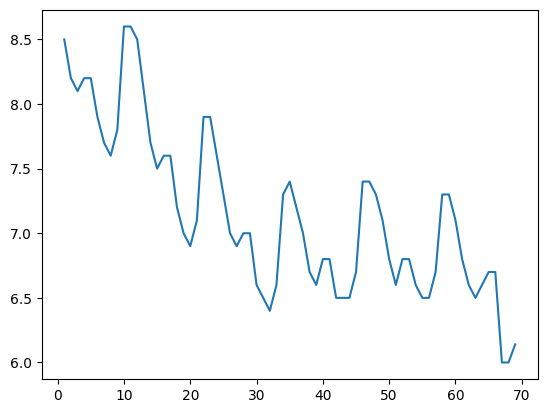

In [551]:
# Ausagbe im Diagramm
plt.plot(t,arbeitslose)

In [552]:
# FFT
N = len(arbeitslose)
# Sample Spacing
T = 1
yf = fft(arbeitslose)
#yf[np.abs(yf)<20] = 0
f = np.linspace(0,0.5*1/T,int(N/2))

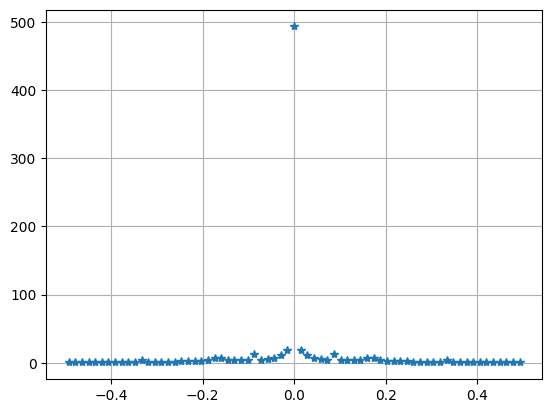

In [553]:
# Frequency Plot
f = fftfreq(N, 1/SAMPLE_RATE)
plt.plot(f, np.abs(yf),'*')
plt.grid()

In [554]:
# Inverse FFT
a_inverse = sp.ifft(yf)


C:\Users\TorstenSchmidt\AppData\Local\Temp\ipykernel_3276\4047675464.py:2: DeprecationWarning: scipy.ifft is deprecated and will be removed in SciPy 2.0.0, use scipy.fft.ifft instead
  a_inverse = sp.ifft(yf)


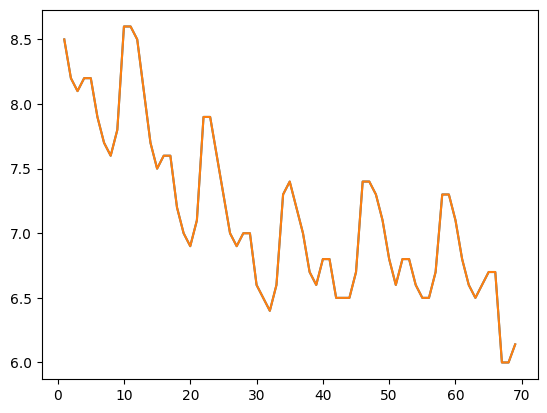

In [555]:
plt.plot(t,np.abs(arbeitslose),t,np.abs(a_inverse))